In [1]:
#import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('r_dataisbeautiful_posts.csv')

C:\Users\Akash Ranjan Sinha\AppData\Local\Temp\ipykernel_8736\2019978653.py:1: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('r_dataisbeautiful_posts.csv')


In [3]:
df.head()

,id,title,score,author,author_flair_text,removed_by,total_awards_received,awarders,created_utc,full_link,num_comments,over_18
0,it7yz2,[OC] The World’s Forests Mapped,1,vividmaps,NaN,NaN,0.0,[],1600173678,https://www.reddit.com/r/dataisbeautiful/comme...,1,False
1,it7uig,[OC] Airbnb presence mapped in Barcelona (BCN)...,1,JonnieNeptune,OC: 2,NaN,0.0,[],1600173208,https://www.reddit.com/r/dataisbeautiful/comme...,0,False
2,it7t4z,A marketplace for open streaming data sources,1,DangerMouse289,NaN,automod_filtered,0.0,[],1600173075,https://www.reddit.com/r/dataisbeautiful/comme...,0,False
3,it7jfq,[OC] Black Owner-Occupied Housing,1,SocialExplorerInc,OC: 17,NaN,0.0,[],1600172010,https://www.reddit.com/r/dataisbeautiful/comme...,1,False
4,it7a3r,[OC] My monthly average steps in 2020. Quarant...,1,ahmedgelemli,OC: 2,NaN,0.0,[],1600171002,https://www.reddit.com/r/dataisbeautiful/comme...,0,False


In [4]:
df.columns

Index(['id', 'title', 'score', 'author', 'author_flair_text', 'removed_by',
       'total_awards_received', 'awarders', 'created_utc', 'full_link',
       'num_comments', 'over_18'],
      dtype='object')

In [5]:
df.shape

(193091, 12)

In [6]:
df.describe() #Only shows numerical columns

,score,total_awards_received,created_utc,num_comments
count,193091.000000,53239.000000,1.930910e+05,193091.000000
mean,180.261157,0.005898,1.501766e+09,26.374502
std,1946.307188,0.241624,6.569719e+07,206.886930
min,0.000000,0.000000,1.329263e+09,0.000000
25%,1.000000,0.000000,1.449986e+09,1.000000
50%,1.000000,0.000000,1.502211e+09,1.000000
75%,4.000000,0.000000,1.561930e+09,4.000000
max,116226.000000,30.000000,1.600174e+09,18801.000000


In [7]:
#To check Missing Value
df.isnull().sum()

id                            0
title                         1
score                         0
author                        0
author_flair_text        166218
removed_by               177406
total_awards_received    139852
awarders                 150523
created_utc                   0
full_link                     0
num_comments                  0
over_18                       0
dtype: int64

In [8]:
#title we cant make by ourself so i think we should drop it
df.dropna(subset=['title'],inplace=True)

In [9]:
df.drop(['created_utc','author_flair_text'],axis=1,inplace=True)

In [10]:
# analyzing the removed_by column
df.removed_by.value_counts()
# See Here we can see that moderator or i think the one who manages their respective community deleted the most post.
# deleted i dont think this make sense but i think the one with no data available wo deleted this post.
# automod_filtered is i think a automatic filter that deleted the post.
# reddit  i think the team of reddit delete some post and the author himself deleted the post.

removed_by
moderator           11036
deleted              2398
automod_filtered     1187
reddit               1063
author                  1
Name: count, dtype: int64

In [11]:
df.over_18.value_counts()

over_18
False    192093
True        997
Name: count, dtype: int64

In [12]:
df.removed_by.value_counts().sum()
# I find here a conclusion that there are more posts are deleted as over_18 posts are less then total deleted post

15685

In [13]:
df.author.value_counts()
# shows people and number of their post they posted here deleted shows the people who

author
[deleted]     29285
jimrosenz      2303
OverflowDs      485
rhiever         327
RAGTIMEMA       325
              ...  
rexsilex          1
Alpmert           1
gme186            1
dgrips            1
th3sousa          1
Name: count, Length: 82566, dtype: int64

In [14]:
df.total_awards_received.value_counts()

total_awards_received
0.0     53136
1.0        58
2.0        13
3.0        11
6.0         5
8.0         4
4.0         3
5.0         3
30.0        1
27.0        1
14.0        1
18.0        1
12.0        1
7.0         1
Name: count, dtype: int64

<Axes: >

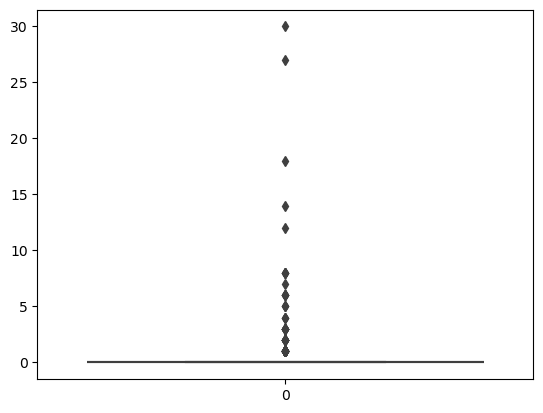

In [15]:
sns.boxplot(df['total_awards_received'])
# Largerly right skewed data and it shows all the point above zero as outliers

In [16]:
df.score.value_counts()
#Again a right skewed data

score
1        110370
0         16214
2          8968
3          5889
4          3994
          ...  
11629         1
2315          1
35216         1
35122         1
1214          1
Name: count, Length: 3996, dtype: int64

In [17]:
df.num_comments.value_counts()

num_comments
1       53956
0       43632
2       28426
3       11569
4        8409
        ...  
1233        1
2256        1
1722        1
1186        1
1029        1
Name: count, Length: 1897, dtype: int64

In [18]:
df.awarders.value_counts()
# As most of the row for this column is like empty so i think i should also drop this

awarders
[]                     42567
['stompstumpstamp']        1
Name: count, dtype: int64

In [19]:
df.drop(['awarders'],axis=1,inplace=True)

In [20]:
# Now lets fill the total awards recieved as this has many outliers so i think we need to fill this using median
df['total_awards_received'].fillna(0,inplace=True)

In [21]:
df.fillna('Not Deleted',inplace=True)
df.isnull().sum()
# here you can see we sucessfully removed all the null values of total_awards_received
# Also filled the null values of removed_by with Not deleted on all the post that was not removed

id                       0
title                    0
score                    0
author                   0
removed_by               0
total_awards_received    0
full_link                0
num_comments             0
over_18                  0
dtype: int64

In [22]:
#Bivariate Analysis
df.groupby('author').sum()['total_awards_received'].sort_values(ascending=False)

author
PieChartPirate         30.0
Spooderman89           27.0
asherfergusson         18.0
_The_Mattmatician      14.0
Janman14               12.0
                       ... 
SpicyFreshMemeStore     0.0
SpicyFarquaad           0.0
SpicyBiker23            0.0
Spickbug                0.0
zzzzz94                 0.0
Name: total_awards_received, Length: 82566, dtype: float64

In [23]:
df.groupby('author').sum()['num_comments'].sort_values(ascending=False)

author
[deleted]             137201
rhiever                69063
BoMcCready             58685
jimrosenz              50146
theimpossiblesalad     49865
                       ...  
ridouan01                  0
benumap                    0
rielenkavi                 0
rieliaskulin               0
hardman-010                0
Name: num_comments, Length: 82566, dtype: int64

In [24]:
df.groupby('author').sum()['over_18'].sort_values(ascending=False)

author
[deleted]         187
indianescorts0      7
licensecrack        5
FrigidShadow        5
angelrumio          5
                 ... 
SquareRobots        0
SquarePeg37         0
SquareMoonNL        0
SquareBottle        0
zzzzz94             0
Name: over_18, Length: 82566, dtype: int64

In [25]:
# Why you do this?
# When i performed EDA then i saw that the actual many or i say mostly 18+ contents are not deleted by anyone that is removing posts.
# Like moderator is responsible for deleting 55% of the post and automod_filtered is responsible for deleting 10% of the post.
# Still the over_18 post that was not deleted is well above 35%.
df.groupby(["over_18","removed_by"]).count()

id   title   score  author  \
over_18 removed_by                                         
False   Not Deleted       176498  176498  176498  176498   
        author                 1       1       1       1   
        automod_filtered    1181    1181    1181    1181   
        deleted             2385    2385    2385    2385   
        moderator          10977   10977   10977   10977   
        reddit              1051    1051    1051    1051   
True    Not Deleted          907     907     907     907   
        automod_filtered       6       6       6       6   
        deleted               13      13      13      13   
        moderator             59      59      59      59   
        reddit                12      12      12      12   

                          total_awards_received  full_link  num_comments  
over_18 removed_by                                                        
False   Not Deleted                      176498     176498        176498  
        author                                1          1             1  
        automod_filtered                   1181       1181          1181  
        deleted                            2385       2385          2385  
        moderator                         10977      10977         10977  
        reddit                             1051       1051          1051  
True    Not Deleted                         907        907           907  
        automod_filtered                      6          6             6  
        deleted                              13         13            13  
        moderator                            59         59            59  
        reddit                               12         12            12

In [26]:
# Number of comments on over_18 post is very high
df.groupby(["over_18","num_comments"]).count()

id  title  score  author  removed_by  \
over_18 num_comments                                            
False   0             43443  43443  43443   43443       43443   
        1             53764  53764  53764   53764       53764   
        2             28316  28316  28316   28316       28316   
        3             11501  11501  11501   11501       11501   
        4              8375   8375   8375    8375        8375   
...                     ...    ...    ...     ...         ...   
True    3532              1      1      1       1           1   
        4235              1      1      1       1           1   
        5936              1      1      1       1           1   
        7121              1      1      1       1           1   
        10394             1      1      1       1           1   

                      total_awards_received  full_link  
over_18 num_comments                                    
False   0                             43443      43443  
        1                             53764      53764  
        2                             28316      28316  
        3                             11501      11501  
        4                              8375       8375  
...                                     ...        ...  
True    3532                              1          1  
        4235                              1          1  
        5936                              1          1  
        7121                              1          1  
        10394                             1          1  

[2032 rows x 7 columns]

In [27]:
df.groupby(["over_18","score"]).count()

id   title  author  removed_by  total_awards_received  \
over_18 score                                                              
False   0       16058   16058   16058       16058                  16058   
        1      109903  109903  109903      109903                 109903   
        2        8940    8940    8940        8940                   8940   
        3        5868    5868    5868        5868                   5868   
        4        3979    3979    3979        3979                   3979   
...               ...     ...     ...         ...                    ...   
True    31961       1       1       1           1                      1   
        34248       1       1       1           1                      1   
        38419       1       1       1           1                      1   
        59130       1       1       1           1                      1   
        63569       1       1       1           1                      1   

               full_link  num_comments  
over_18 score                           
False   0          16058         16058  
        1         109903        109903  
        2           8940          8940  
        3           5868          5868  
        4           3979          3979  
...                  ...           ...  
True    31961          1             1  
        34248          1             1  
        38419          1             1  
        59130          1             1  
        63569          1             1  

[4133 rows x 7 columns]

In [28]:
df.corr(numeric_only=True)
# Here we can see that the correlation between score and num_comments is positive and 0.6

,score,total_awards_received,num_comments,over_18
score,1.000000,0.156223,0.597279,0.018457
total_awards_received,0.156223,1.000000,0.168735,0.005340
num_comments,0.597279,0.168735,1.000000,0.028543
over_18,0.018457,0.005340,0.028543,1.000000


In [59]:
# Now we create a new column name adult_18 and 1 for all the post that is over_18 and otherwise 0.
df["adult_18"]=0
df["adult_18"]=df["over_18"].apply(lambda row:0 if row==False else 1)

In [61]:
df['adult_18'].value_counts()

adult_18
0    192093
1       997
Name: count, dtype: int64

In [68]:
for i in range(0,len(df)):
    if i==107213:
        continue
    if df.loc[i,"removed_by"]!="Not Deleted":
        df.loc[i,"adult_18"]=1

In [70]:
df['adult_18'].value_counts()

adult_18
0    176498
1     16592
Name: count, dtype: int64

In [ ]:
# Now machines never understand any alphabet so you need to change the sentences into numbers so that machine can understand it.
# Tokenization-This is method through which you breaks the sentences into a chunk. Like word_token(one of tokenization) method split the sentences into
#--words and then send it to algorithm called embedding which assign numbers to these words. But Before all this we need to clean our text. Like there 
#--many words like (i,am,her) unwanted words called stop words which you need to remove because this only increase the time nothing else. So to this there
#-- is a method called stop word removakl

In [ ]:
# Now there's one more thing like there are words like run, runs,running all are same but still they are getting different numbers.This also take time
#--so we need to make this into one single word. So to do this we have a method called stemming. This remove the suffix to make make them equal but there
#-- are problem in this like words like  car,care in this method both are treated as car but they are different and another problem is run, ran . These
#-- both words are treated differently because this method do not understand the part of speech.
# Another method called lammetization which first identify parts of speech and then make then into a single word. But here we are using stemming.
# Lammetization is best but this take so much time and cost and my computer do not allow this method to happen as my computer do have that high features.
#--Due to this reason we are using stemming which is not that good.
# All the library are available in nltk(natural language tool kit)

In [90]:
import nltk
import string
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

def preprocess_text_column(df, column):
    # Ensure necessary NLTK resources are downloaded
    nltk.download('punkt')
    nltk.download('stopwords')
    
    stop_words = set(stopwords.words('english'))
    stemmer = PorterStemmer()
    
    def preprocess_text(text):
        text = text.lower()
        text = text.translate(str.maketrans('', '', string.punctuation))
        words = word_tokenize(text)
        filtered_words = [word for word in words if word.isalnum() and word not in stop_words]
        stemmed_words = [stemmer.stem(word) for word in filtered_words]
        return ' '.join(stemmed_words)
    
    df[column] = df[column].apply(preprocess_text)
    return df

In [115]:
df=preprocess_text_column(df, 'title')

[nltk_data] Downloading package punkt to C:\Users\Akash Ranjan
[nltk_data]     Sinha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Akash Ranjan
[nltk_data]     Sinha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [120]:
df

,id,title,score,author,removed_by,total_awards_received,full_link,num_comments,over_18,adult_18
0,it7yz2,oc world forest map,1,vividmaps,Not Deleted,0.0,https://www.reddit.com/r/dataisbeautiful/comme...,1,False,0
1,it7uig,oc airbnb presenc map barcelona bcn spain 33 n...,1,JonnieNeptune,Not Deleted,0.0,https://www.reddit.com/r/dataisbeautiful/comme...,0,False,0
2,it7t4z,marketplac open stream data sourc,1,DangerMouse289,automod_filtered,0.0,https://www.reddit.com/r/dataisbeautiful/comme...,0,False,1
3,it7jfq,oc black owneroccupi hou,1,SocialExplorerInc,Not Deleted,0.0,https://www.reddit.com/r/dataisbeautiful/comme...,1,False,0
4,it7a3r,oc monthli averag step 2020 quarantin got april,1,ahmedgelemli,Not Deleted,0.0,https://www.reddit.com/r/dataisbeautiful/comme...,0,False,0
...,...,...,...,...,...,...,...,...,...,...
193086,pqbdl,infosthet seem like belong,15,magiclamp,Not Deleted,0.0,https://www.reddit.com/r/dataisbeautiful/comme...,0,False,0
193087,pqav2,time lap everi nuclear deton 1945 1998,9,th3sousa,Not Deleted,0.0,https://www.reddit.com/r/dataisbeautiful/comme...,0,False,0
193088,pq922,wavii,13,ddshroom,Not Deleted,0.0,https://www.reddit.com/r/dataisbeautiful/comme...,2,False,0
193089,ppx09,interact repr pre obama 2013 budget propo,21,zanycaswell,Not Deleted,0.0,https://www.reddit.com/r/dataisbeautiful/comme...,0,False,0


In [76]:
!pip install wordcloud

   ---------------------------------------- 0.0/299.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/299.9 kB ? eta -:--:--
   --------- ----------------------------- 71.7/299.9 kB 991.0 kB/s eta 0:00:01
   ------------------------------- -------- 235.5/299.9 kB 2.1 MB/s eta 0:00:01
   ---------------------------------------- 299.9/299.9 kB 2.1 MB/s eta 0:00:00


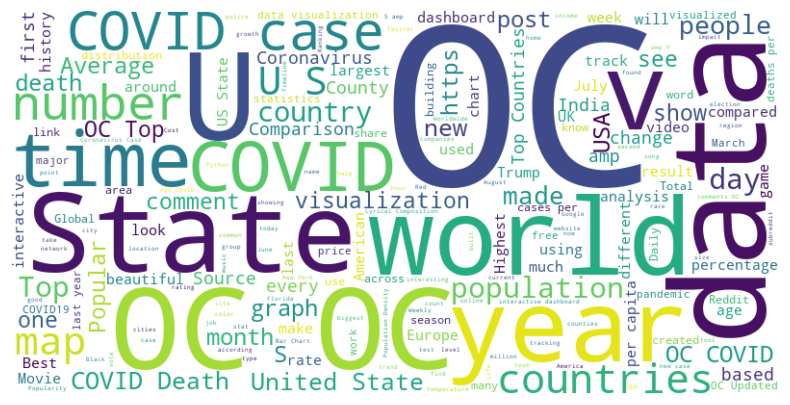

In [86]:
from wordcloud import WordCloud
df_test=df.iloc[:10000,:]
test_data=' '.join(df_test['title'])
wordcloud=WordCloud(width=800,height=400, background_color='white').generate(test_data)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [128]:
from sklearn.feature_extraction.text import TfidfVectorizer
def generate_tfidf(df, column):
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(df[column])
    tfidf_df = pd.DataFrame.sparse.from_spmatrix(tfidf_matrix, columns=vectorizer.get_feature_names_out())
    return tfidf_df

In [130]:
a=generate_tfidf(df, 'title')

In [143]:
a.sample(10)

,00,000,0000,000000,0000218,00005,0001,00012100,0003,000719,...,𝐖𝐎𝐑𝐋𝐃,𝐖𝐨𝐫𝐥𝐝,𝐨𝐟,𝔾𝕒𝕡𝕞𝕚𝕟𝕕𝕖𝕣,𝕄𝕒𝕡,𝕎𝕠𝕣𝕝𝕕,𝗖𝗼𝘃𝗶𝗗𝗮𝘁𝗮,𝗛𝗨𝗕𝗖𝗢𝗠𝗘𝗖𝗢𝗠,𝟐𝟎𝟎𝟎,𝟚𝟘𝟙𝟘
36120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
187679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37864,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
113815,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46897,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39867,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
122212,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
95720,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
187506,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11302,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [145]:
df_c=pd.concat([a,df['adult_18']],axis=1)

In [147]:
df_c

,00,000,0000,000000,0000218,00005,0001,00012100,0003,000719,...,𝐖𝐨𝐫𝐥𝐝,𝐨𝐟,𝔾𝕒𝕡𝕞𝕚𝕟𝕕𝕖𝕣,𝕄𝕒𝕡,𝕎𝕠𝕣𝕝𝕕,𝗖𝗼𝘃𝗶𝗗𝗮𝘁𝗮,𝗛𝗨𝗕𝗖𝗢𝗠𝗘𝗖𝗢𝗠,𝟐𝟎𝟎𝟎,𝟚𝟘𝟙𝟘,adult_18
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193086,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193087,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193088,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193089,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [149]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [151]:
def train_and_evaluate_models(df, labels):
    X_train, X_test, y_train, y_test = train_test_split(df, labels, test_size=0.2, random_state=42)
    
    models = {
        "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
        "SVM": SVC(kernel='linear', random_state=42),
        "Decision Tree": DecisionTreeClassifier(random_state=42)
    }
    
    results = {}
    
    for name, model in models.items():
        print(f"Training {name}...")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        cross_val = np.mean(cross_val_score(model, X_train, y_train, cv=5))
        
        print(f"{name} Accuracy: {accuracy:.4f}")
        print(f"{name} Cross Validation Score: {cross_val:.4f}")
        print(classification_report(y_test, y_pred))
        
        results[name] = {
            "accuracy": accuracy,
            "cross_val_score": cross_val,
            "classification_report": classification_report(y_test, y_pred, output_dict=True)
        }
    
    return results


In [ ]:
b=train_and_evaluate_models(df_c.iloc[:,0:69112],df_c['adult_18'])

In [203]:
df_c.iloc[:,-1].value_counts()

adult_18
0.0    176499
1.0     16592
Name: count, dtype: int64

In [201]:
print(df_c.iloc[:,0:].isnull().sum().sum()) 

C:\Users\Akash Ranjan Sinha\AppData\Local\Temp\ipykernel_8736\732206590.py:1: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  print(df_c.iloc[:,0:].isnull().sum().sum())


0


In [199]:
df_c.fillna(0, inplace=True)